In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import pylab as plt
import glob
import os
from pprint import pprint
import scipy.integrate as inte
import scipy.special as special
import scipy.interpolate as interp
import scipy.signal as sig

In [3]:
import stephane.display.graphes as graphes
import stephane.tools.Smath as smath

import icewave.tools.datafolders as df
import icewave.tools.rw_data as rw
import icewave.phone.analyse as analyse


#import sympy #symoblic python
#import mpmath as math
#import cv2
import glob
import csv
import os

import icewave.field.multi_instruments as multi

import phonefleet.connect as connect
import phonefleet.data as dataphone
import icewave.phone.pipeline as pl

macOS
Stephanes-MacBook-Air-2.local
/Volumes/F-1/Data/
/Volumes/F-1/Data/
/Volumes/F-1/Data/
Please install garmin package


In [108]:

#base = f'/media/turbots/BlueDisk/Shack25_local/'

date = '0211'

#folder = base +f'Data/{date}/Phone/*/'
#savefolder = base + f'Data/{date}/Phone/Results/'
folder = pl.summary_folder(date)
filename = folder+'Phone_Table.txt'
params = pl.parse_phone_table(filename)

/Volumes/F-1/Data/
[['tag', 'tstart', 'tend', 'phonelist', 'nums', 'orientation'], ['sismo_active', '13:38:00', '13:48:00', '1:16', '9,10', 'z,y,x'], ['wave', '14:00:00', '00:00:00', '17,18,19,21:28,31,32,35', '10:100', 'z,y,x']]
phonelist 1:16
nums 9,10
phonelist 17,18,19,21:28,31,32,35
nums 10:100


[{'tag': 'sismo_active',
  'phonelist': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
  'nums': [9, 10],
  'orientation': ['z', 'y', 'x'],
  'tmin': '13:38:00',
  'tmax': '13:48:00'},
 {'tag': 'wave',
  'phonelist': [17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 31, 32, 35],
  'nums': [10,
   11,
   12,
   13,
   14,
   15,
   16,
   17,
   18,
   19,
   20,
   21,
   22,
   23,
   24,
   25,
   26,
   27,
   28,
   29,
   30,
   31,
   32,
   33,
   34,
   35,
   36,
   37,
   38,
   39,
   40,
   41,
   42,
   43,
   44,
   45,
   46,
   47,
   48,
   49,
   50,
   51,
   52,
   53,
   54,
   55,
   56,
   57,
   58,
   59,
   60,
   61,
   62,
   63,
   64,
   65,
   66,
   67,
   68,
   69,
   70,
   71,
   72,
   73,
   74,
   75,
   76,
   77,
   78,
   79,
   80,
   81,
   82,
   83,
   84,
   85,
   86,
   87,
   88,
   89,
   90,
   91,
   92,
   93,
   94,
   95,
   96,
   97,
   98,
   99,
   100],
  'orientation': ['z', 'y', 'x'],
  'tmin': '14:00:00',
  'tmax': '0

In [16]:
params[1]['nums']=params[1]['nums'][0:5]
print(params[1]['nums'])

[10, 11, 12, 13, 14]


In [22]:
hf = pl.load_lvl_1("0211",17,12)


<KeysViewHDF5 ['GPS_time', 'ax', 'ay', 'az', 'complete', 'coords', 'date', 'filename', 'folder', 'gpselev', 'gpslat', 'gpslon', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'num', 'oural_time', 'phone', 'position_GPS', 'position_Garmin', 't_sync', 'ta', 'tg', 'tgps', 'tm']>

In [29]:
print(hf.keys())
for var in ['a','g','m']:
    print(hf['t'+var][0])
    print(hf['t_sync']+1)
    

<KeysViewHDF5 ['GPS_time', 'ax', 'ay', 'az', 'complete', 'coords', 'date', 'filename', 'folder', 'gpselev', 'gpslat', 'gpslon', 'gx', 'gy', 'gz', 'mx', 'my', 'mz', 'num', 'oural_time', 'phone', 'position_GPS', 'position_Garmin', 't_sync', 'ta', 'tg', 'tgps', 'tm']>
412838.39459


TypeError: unsupported operand type(s) for +: 'Dataset' and 'int'

In [44]:
import icewave.field.time as timest
timest.display_time([multi.convert_time(param['tmin']),multi.convert_time(param['tmax'])])

['14:00:00', '00:00:00']

In [82]:
param['nums']=range(13,18)

In [83]:
import icewave.phone.waves as waves
param = params[1]
param['date']='0211'
phone = 17
tmin = multi.convert_time(param['tmin'])
tmax = multi.convert_time('16:00:00')
data = waves.load_data_phone(param['date'],phone,param['nums'],tmin,tmax,param['orientation'],dt=0.02)
#data = pl.load_data_N1(param,typ='waves')#date,phonelist,nums,tmin,tmax,orientation)

Load data N1 for phone 17
[52173.3263   52173.3463   52173.3663   ... 56587.574788 56587.594788
 56587.614788]
[52173.345906 52173.365906 52173.385906 ... 56587.594413 56587.614413
 56587.634413]
[52355.907186 52355.927186 52355.947186 ... 56855.846261 56855.866261
 56855.886261]


In [84]:
len(data['tia'])

220717

(-0.025, 0.025)

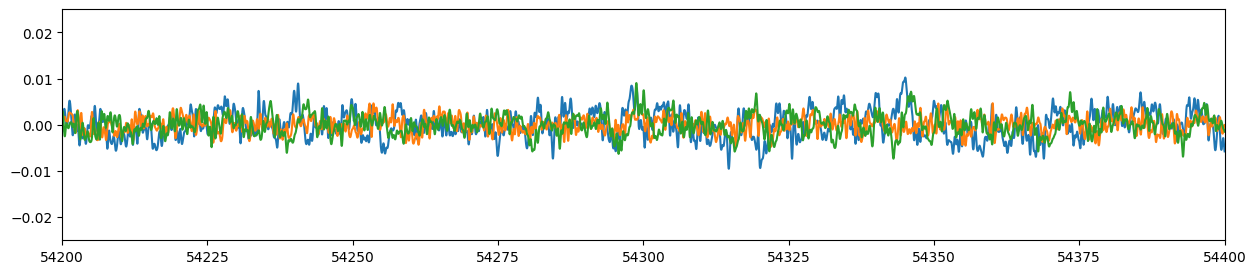

In [103]:
fig,ax = plt.subplots(figsize=(15,3))
ax.plot(data['tia'],data['ai_z'])
ax.plot(data['tia'],data['ai_x'])
ax.plot(data['tia'],data['ai_y'])

plt.xlim([54200,54400])
plt.ylim([-0.025,0.025])

In [110]:
base = '/Volumes/F-1/Data/'
filelist = glob.glob(base+'0211/Phone/*/*.h5')

In [111]:
pprint(len(filelist))
pprint(filelist)

980
['/Volumes/F-1/Data/0211/Phone/Summary/Sismo_1_13_38_00_13_48_00.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num1.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num2.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num3.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num4.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num5.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num6.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num7.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num8.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num9.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num10.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num11.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num12.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num13.h5',
 '/Volumes/F-1/Data/0211/Phone/25/2025_02_11_L1_phone25_num14.h5

/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/37.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/22.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/40.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/21.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/23.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/24.csv
dict_keys(['date', 'local_time', 'phone', 'num', 'var', 'tag', 'A_wave', 'filename'])
/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/25.csv
d

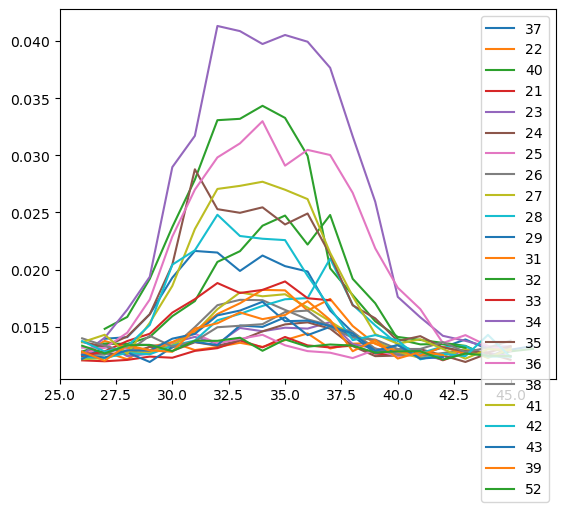

In [36]:
filelist = glob.glob('/media/turbots/BlueDisk/Shack25_local/Data/0204/Phone/Summary/*.csv')

phonelist = []
for filename in filelist:
    print(filename)
    phone = int(filename.split('/')[-1].split('.')[0])
    phonelist.append(phone)
    a = rw.read_csv(filename,delimiter=',')
    data = rw.csv2dict(a)
    print(data.keys())

    nums = np.asarray(data['num']).astype(int)
    awave = np.asarray(data['A_wave']).astype(float)

    plt.plot(nums[25:45],awave[25:45],'-')
    
plt.legend(phonelist)